In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns


In [11]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0


body = client_1f9d9489bdbb452eabef9655bdeff97d.get_object(Bucket='kaggle-donotdelete-pr-idxy32fn5o1fhl',Key='train.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_train = pd.read_csv(body)
df_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [100]:
df_train_set= df_train.dropna()
df_train_set = df_train_set.reset_index()
df_train_set = df_train_set.drop(columns='index',axis=1)
df_train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


## Exploratory data analysis

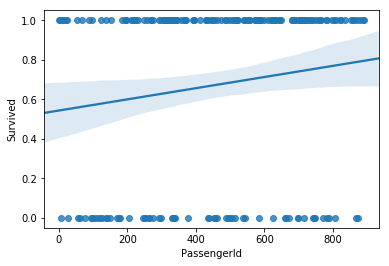

In [90]:
sns.regplot(x='PassengerId',y='Survived',data=df_train_set)

In [91]:
df_train_set[['PassengerId','Survived']].corr()

,PassengerId,Survived
PassengerId,1.000000,0.148495
Survived,0.148495,1.000000


#### __Relation between Survived column and Pclass__

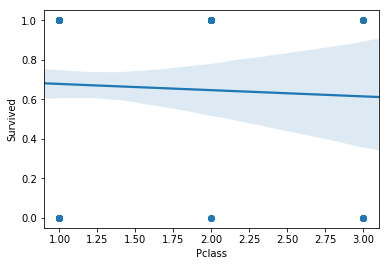

In [49]:
sns.regplot(x='Pclass',y='Survived',data=df_train_set)

In [50]:
df_train_set[['Pclass','Survived']].corr()

,Pclass,Survived
Pclass,1.000000,-0.034542
Survived,-0.034542,1.000000


In [51]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df_train_set['Pclass'], df_train_set['Survived'])
print(pearson_coef,p_value)

-0.034542191683370346 0.6424938479885327


Based on the regression plot and the pearson correlation coefficient, Pclass is not a suitable predictor for Survived.

#### Relation between survived and Sibsp columns

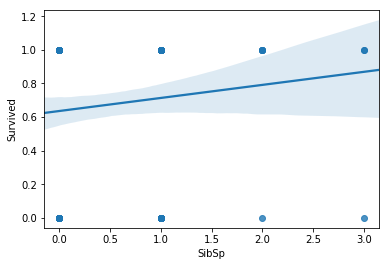

In [52]:
sns.regplot(x='SibSp',y='Survived',data=df_train_set)

In [53]:
df_train_set[['SibSp','Survived']].corr()

,SibSp,Survived
SibSp,1.000000,0.106346
Survived,0.106346,1.000000


In [54]:
pearson_coef,p_value = stats.pearsonr(df_train_set['SibSp'],df_train_set['Survived'])
print(pearson_coef,',',p_value)

0.10634622516806645 , 0.15190533112976867


#### Relation between Parch and Survived

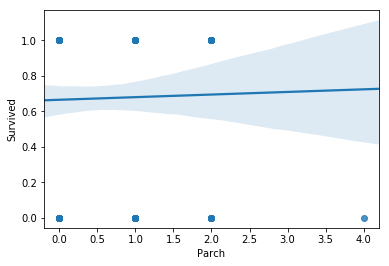

In [55]:
sns.regplot(x='Parch',y='Survived',data=df_train_set)

In [56]:
df_train_set[['Parch','Survived']].corr()

,Parch,Survived
Parch,1.000000,0.023582
Survived,0.023582,1.000000


In [58]:
pearson_coef,p_value=stats.pearsonr(df_train_set['Parch'],df_train_set['Survived'])
print(pearson_coef,',',p_value)

0.023582408022357712 , 0.7513384347828423


#### Relation between Fare and Survived

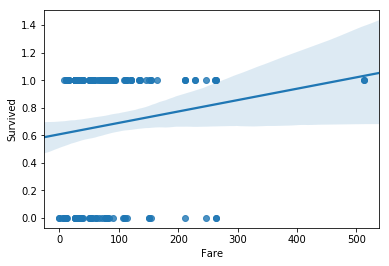

In [59]:
sns.regplot(x='Fare',y='Survived',data=df_train_set)

In [60]:
df_train_set[['Fare','Survived']].corr()

,Fare,Survived
Fare,1.000000,0.134241
Survived,0.134241,1.000000


In [61]:
pearson_coef,p_value=stats.pearsonr(df_train_set['Fare'],df_train_set['Survived'])
print(pearson_coef,',',p_value)

0.13424105283521096 , 0.07002557714937319


#### Relation between Age and Survived

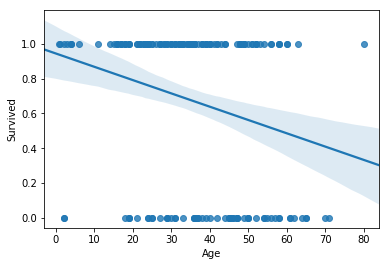

In [62]:
sns.regplot(x='Age',y='Survived',data=df_train_set)

In [63]:
df_train_set[['Age','Survived']].corr()

,Age,Survived
Age,1.000000,-0.254085
Survived,-0.254085,1.000000


#### Relation between Sex and survived

In [82]:
df_set = df_train_set[['Sex','Survived']]
df_set = df_set.reset_index()
df_set = df_set.groupby(['Sex'])
df_set.head()

,index,Sex,Survived
0,1,female,1
1,3,female,1
2,6,male,0
3,10,female,1
4,11,female,1
5,21,male,1
6,23,male,1
7,27,male,0
8,52,female,1
9,54,male,0


In [79]:
f_score,p_value = stats.f_oneway(df_set.get_group('female')['Survived'],df_set.get_group('male')['Survived'])
print(f_score,p_value)

71.60592300757907 8.693868321546973e-15


Based on the ANOVA results, Sex is a valid predictor for Survived.

#### Relation between Embarked and Survived

In [85]:
df_em = df_train_set[['Embarked','Survived']]
df_em = df_em.reset_index()
df_em= df_em.groupby(['Embarked'])
df_em.head()

,index,Embarked,Survived
0,1,C,1
1,3,S,1
2,6,S,0
3,10,S,1
4,11,S,1
5,21,S,1
8,52,C,1
9,54,C,0
15,96,C,0
16,97,C,1


In [87]:
f_score,p_value = stats.f_oneway(df_em.get_group('C')['Survived'],df_em.get_group('S')['Survived'],df_em.get_group('Q')['Survived'])
print(f_score,p_value)

1.0862244905197234 0.33968999726337


Based on the ANOVA results, Embarked is not a valid predictor for survived.

In [108]:
df = pd.get_dummies(df_train_set['Sex'])
df_train_set[['female','male']] = df[['female','male']]
df_train_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,1
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,1,0
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,1,0
5,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,0,1
6,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,0,1
7,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,0,1
8,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,1,0
9,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C,0,1


## Model Development - Linear Regression

In [122]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
x = df_train_set[['female','male']]
y = df_train_set['Survived']
lr.fit(x,y)
r2 = lr.score(x,y)
yhat = lr.predict(x)

In [132]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(df_train_set['Survived'],yhat)
print('MSE:',mse,',','R2:',r2)

MSE: 0.1579025805945564 , R2: 0.2834688995215313


## Model Evaluation

In [143]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0


body = client_1f9d9489bdbb452eabef9655bdeff97d.get_object(Bucket='kaggle-donotdelete-pr-idxy32fn5o1fhl',Key='test.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_test = pd.read_csv(body)
df_test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [148]:
df_test_set = df_test.drop(columns = ['Name','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked','Pclass'],axis=1)
df_test_set = df_test_set.reset_index()
df_test_set = df_test_set.drop(columns =['index'])
df_input = pd.get_dummies(df_test_set['Sex'])
df_test_set[['Female','Male']] = df_input[['female','male']]
df_test_set.head()

,PassengerId,Sex,Female,Male
0,892,male,0,1
1,893,female,1,0
2,894,male,0,1
3,895,male,0,1
4,896,female,1,0


In [149]:
xtest = df_test_set[['Female','Male']]
yhat = lr.predict(xtest)

In [158]:
df_test_set['Survived'] = yhat.round(0).astype(int)

In [163]:
df_final = df_test_set[['PassengerId','Survived']]

In [162]:
df_final.to_csv (r'C:\Users\Smizzy\Desktop\Titanic_dataframe.csv', index = True, header=True)

In [164]:
df_final

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [172]:
import os
os.getcwd( )

'/home/dsxuser/work'